<a href="https://colab.research.google.com/github/stemarzo/DISME/blob/main/04_Quarto_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QUARTO ASSIGNMENT: CONVOLUTIONAL NEURAL NETWORK

In [ ]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [ ]:
import numpy as np

##Esercitazione

### Dataset

Loader già definito da keras, simile a quello fatto da noi per l'audio, ma già fornito

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Esplorazione del dataset

In [ ]:
x_train.shape

(60000, 28, 28)

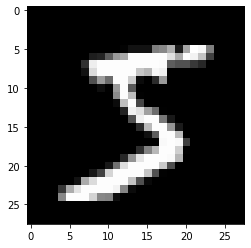

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap="gray")

### Preprocessing

Aggiungiamo una dimensione fittizia, in quanto si aspettano una immagine a 4 canali

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[0,6,12]

array([170], dtype=uint8)

riscalo i valori nell'intervallo tra 0 e 1

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
x_train[0,6,12]

array([0.6666667], dtype=float32)

Etichette corrispondenti al numero rappresentato

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

trasformare le etichette in formato categorico \\
5 -> [0 0 0 0 0 1 0 0 0 0] \\
7 -> [0 0 0 0 0 0 0 1 0 0] \\
one hot encoding

In [ ]:
yc_train = keras.utils.to_categorical(y_train, 10)
yc_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
yc_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Fully Connected Model

modello di tipo sequenzale i risultati passano attraverso i layer che manipolano uno dopo l'altro

In [ ]:
model = keras.Sequential() #cioè prendo input elaboro con un layer, passo al layer dopo etc. 
model.add(keras.Input((28,28,1))) #dice la grandezza delle dimensioni dell'input
model.add(keras.layers.Flatten()) #non manipola i valori dentro l'immagine, ma li distribuisce su un solo vettore, ed ha senso su un esempio così semplice.
model.add(keras.layers.Dense(10, activation='softmax')) #softmax, va sempre messo con la classificazione

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy, #confronta le etichette con la nostra risposta e ha info su come migliorare la rete
              optimizer=keras.optimizers.Adadelta(),
              metrics=['Accuracy'])

In [ ]:
model.fit(x_train, yc_train, batch_size=128, epochs=10, 
          verbose=1, validation_data=(x_test, yc_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3761 - Accuracy: 0.0930 - val_loss: 2.3573 - val_Accuracy: 0.1020
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3442 - Accuracy: 0.1070 - val_loss: 2.3236 - val_Accuracy: 0.1174
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3107 - Accuracy: 0.1238 - val_loss: 2.2888 - val_Accuracy: 0.1350
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2765 - Accuracy: 0.1451 - val_loss: 2.2535 - val_Accuracy: 0.1569
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2422 - Accuracy: 0.1687 - val_loss: 2.2184 - val_Accuracy: 0.1826
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2081 - Accuracy: 0.1939 - val_loss: 2.1837 - val_Accuracy: 0.2111
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1743 - Accuracy: 0.2218 - val_loss: 2.1493 - val_Accuracy: 0.2380
Epoch 

i dieci neuroni di output sono la risposta che ci da la nostra rete neurale 

In [ ]:
model = keras.Sequential() #cioè prendo input elaboro con un layer, passo al layer dopo etc. 
model.add(keras.Input((28,28,1))) #dice la grandezza delle dimensioni dell'input
model.add(keras.layers.Flatten()) #non manipola i valori dentro l'immagine, ma li distribuisce su un solo vettore, ed ha senso su un esempio così semplice.
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['Accuracy'])

In [ ]:
model.fit(x_train, yc_train, batch_size=128, epochs=10, 
          verbose=1, validation_data=(x_test, yc_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.4115 - Accuracy: 0.0923 - val_loss: 2.3661 - val_Accuracy: 0.1019
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3302 - Accuracy: 0.1143 - val_loss: 2.2859 - val_Accuracy: 0.1316
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2537 - Accuracy: 0.1514 - val_loss: 2.2101 - val_Accuracy: 0.1776
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1810 - Accuracy: 0.2043 - val_loss: 2.1374 - val_Accuracy: 0.2416
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1108 - Accuracy: 0.2736 - val_loss: 2.0666 - val_Accuracy: 0.3254
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 2.0422 - Accuracy: 0.3516 - val_loss: 1.9972 - val_Accuracy: 0.4026
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.9751 - Accuracy: 0.4221 - val_loss: 1.9291 - val_Accuracy: 0.4641
Epoch 

In [ ]:
score = model.evaluate(x_test, yc_test, verbose=0)

In [ ]:
score[1]

0.6004999876022339

In [ ]:
yc_pred = model.predict(x_test)

In [ ]:
yc_pred[1]

array([0.08533619, 0.07966439, 0.21307142, 0.11575572, 0.03910577,
       0.11687014, 0.1460139 , 0.02809788, 0.11156641, 0.0645182 ],
      dtype=float32)

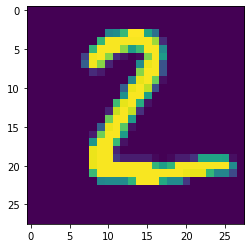

In [ ]:
plt.imshow(x_test[1,:,:,0])

## Assignment

###Dati mnist

In [ ]:
model = keras.Sequential() 
model.add(keras.Input((28,28,1))) 
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation(keras.activations.relu))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['Accuracy'])

In [ ]:
model.fit(x_train, yc_train, batch_size=128, epochs=10, 
          verbose=1, validation_data=(x_test, yc_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2753 - Accuracy: 0.1618 - val_loss: 2.2460 - val_Accuracy: 0.2177
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2142 - Accuracy: 0.2912 - val_loss: 2.1778 - val_Accuracy: 0.3657
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 2.1418 - Accuracy: 0.4355 - val_loss: 2.0998 - val_Accuracy: 0.5068
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 2.0600 - Accuracy: 0.5504 - val_loss: 2.0128 - val_Accuracy: 0.5981
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 1.9691 - Accuracy: 0.6256 - val_loss: 1.9157 - val_Accuracy: 0.6535
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.8674 - Accuracy: 0.6749 - val_loss: 1.8074 - val_Accuracy: 0.6972
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 1.7558 - Accuracy: 0.7110 - val_loss: 1.6909 - val_Accuracy: 0.7275
Epoch 

In [ ]:
score = model.evaluate(x_test, yc_test, verbose=0)

In [ ]:
score[0]

1.3289800882339478

In [ ]:
score[1]

0.7885000109672546

In [ ]:
yc_pred = model.predict(x_test)

In [ ]:
yc_pred[1]

array([0.0639873 , 0.05741798, 0.25380588, 0.1998516 , 0.02555311,
       0.12047096, 0.14377958, 0.01023686, 0.09186979, 0.03302696],
      dtype=float32)

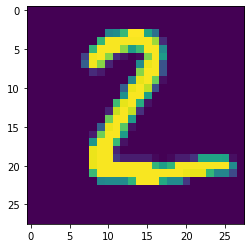

In [ ]:
plt.imshow(x_test[1,:,:,0])

###Dati Cifar

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

In [ ]:
x_train_cifar.shape

(50000, 32, 32, 3)

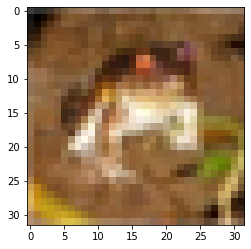

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train_cifar[0], cmap="gray")

In [ ]:
x_train_cifar[0,6,12]

array([107,  71,  34], dtype=uint8)

In [ ]:
y_train_cifar[1]

array([9], dtype=uint8)

In [ ]:
yc_train_cifar = keras.utils.to_categorical(y_train_cifar, 10)
yc_test_cifar = keras.utils.to_categorical(y_test_cifar, 10)

In [ ]:
yc_train_cifar[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
x_train_cifar = x_train_cifar.astype('float32')/255.0
x_test_cifar = x_test_cifar.astype('float32')/255.0

In [ ]:
x_train_cifar[0,6,12]

array([0.41960785, 0.2784314 , 0.13333334], dtype=float32)

In [ ]:
model = keras.Sequential() 
model.add(keras.Input((32,32,3))) 
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation(keras.activations.relu))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['Accuracy'])

In [ ]:
model.fit(x_train_cifar, yc_train_cifar, batch_size=128, epochs=10, 
          verbose=1, validation_data=(x_test_cifar, yc_test_cifar))

In [ ]:
score = model.evaluate(x_test_cifar, yc_test_cifar, verbose=0)

In [ ]:
score[0]

3.029388189315796

In [ ]:
yc_pred = model.predict(x_test_cifar)

In [ ]:
yc_pred[1]

array([1.6892309e-01, 4.9693972e-01, 1.3785397e-04, 3.5602778e-05,
       3.6263087e-10, 5.8517458e-07, 6.8286346e-07, 5.0816543e-06,
       2.1563195e-02, 3.1239420e-01], dtype=float32)

In [ ]:
yc_train_cifar[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

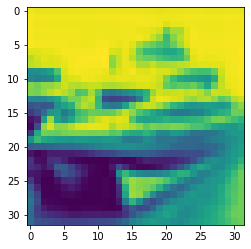

In [ ]:
plt.imshow(x_test_cifar[1,:,:,0])